In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
import seaborn as sns

plt.rc("font", family = "NanumGothic")
sns.set(font="NanumGothic", rc={"axes.unicode_minus":False}, style='white')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (24.9 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126111 files and direc

In [2]:
# 1. Java Î∞è konlpy ÏÑ§Ïπò
!apt-get update
!apt-get install -y openjdk-11-jdk
!pip install konlpy JPype1==1.4.1

# 2. JAVA_HOME ÌôòÍ≤ΩÎ≥ÄÏàò ÏÑ§Ï†ï
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,249 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,986 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/

In [3]:
import pandas as pd
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt

df = pd.read_csv("merged_reviews_by_professor.csv")

In [4]:
# ÍµêÏàòÎ≥Ñ Î¶¨Î∑∞ ÌÜµÌï©
grouped = df.groupby("professor")["review"].apply(lambda x: " ".join(x.dropna().astype(str))).reset_index()
grouped["review"] = grouped["review"].str.replace(r'\n', ' ', regex=True)

def clean_text(text):
    import re
    text = re.sub(r"[^\uAC00-\uD7A3\s]", "", text)
    text = re.sub(r"\s+", " ", text)
    return text.strip()

grouped["review"] = grouped["review"].apply(clean_text)

# ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞ Ï¥àÍ∏∞Ìôî
okt = Okt()

# Í∏çÏ†ï ÌÇ§ÏõåÎìú Î™©Î°ù Ï†ïÏùò
positive_keywords = { "Ï¢ãÎã§", "Ïû¨Î∞åÎã§", "Ïù¥Ìï¥", "Ïó¥Ï†ï", "ÏÑ§Î™Ö", "ÏâΩÎã§", "Ïú†Ïùµ", "ÍπîÎÅî", "Î™ÖÌôï", "ÏπúÏ†à", "Ïú†Ïæå", "ÏûòÌïòÎã§", "Ïú†Îä•", "ÏÑ±Ïã§", "Ï≤¥Í≥Ñ", "Ï†ÑÎ¨∏", "ÏÑ±Ïùò", "Î∞∞Î†§", "Í≥µÍ∞ê", "ÎèÑÏõÄ", "Ìù•ÎØ∏" }

In [5]:
# ÌÇ§ÏõåÎìú Ï∂îÏ∂ú Î∞è Í∏çÏ†ï Îã®Ïñ¥ Ïàò Í≥ÑÏÇ∞ Ìï®Ïàò Ï†ïÏùò
def extract_keywords(text):
    words = okt.pos(text, stem=True)
    return [word for word, tag in words if tag in ["Noun", "Adjective", "Verb"]]

def count_positive(words):
    return sum(1 for word in words if word in positive_keywords)

# ÌÇ§ÏõåÎìú Ï∂îÏ∂ú
grouped["keywords"] = grouped["review"].apply(extract_keywords)

# Ï†ÑÏ≤¥ ÌÇ§ÏõåÎìú ÎπàÎèÑ Í≥ÑÏÇ∞
all_keywords = grouped["keywords"].sum()
all_counter = Counter(all_keywords)

# ÍµêÏàòÎ≥Ñ Í≥†Ïú†Ìïú ÎåÄÌëú ÌÇ§ÏõåÎìú Ï∂îÏ∂ú Ìï®Ïàò (Ìù¨ÏÜåÏÑ± Í≥†Î†§)
def get_top_keywords_unique(word_list):
    filtered = [w for w in word_list if w in positive_keywords]
    counter = Counter(filtered)
    # Ìù¨ÏÜåÏÑ± Ï†êÏàò: Ìï¥Îãπ ÍµêÏàòÏùò ÎπàÎèÑ / Ï†ÑÏ≤¥ Î¶¨Î∑∞Ïóê Îì±Ïû•Ìïú ÎπàÎèÑ
    score_list = [(kw, freq / all_counter[kw]) for kw, freq in counter.items()]
    score_list.sort(key=lambda x: (-x[1], -counter[x[0]]))  # Ìù¨ÏÜåÏÑ± > ÎπàÎèÑ Í∏∞Ï§Ä Ï†ïÎ†¨
    return ", ".join([kw for kw, _ in score_list[:3]])

In [6]:
# Î∂ÑÏÑù Î∞è Ï†êÏàò Í≥ÑÏÇ∞
grouped["positive_score"] = grouped["keywords"].apply(count_positive)
grouped["review_count"] = grouped["keywords"].apply(len)
grouped["popularity_score"] = grouped["positive_score"] + grouped["review_count"].apply(lambda x: 0.1 * x)
grouped["top_keywords"] = grouped["keywords"].apply(get_top_keywords_unique)

# ÏÉÅÏúÑ 5Î™Ö Ï∂îÏ∂ú Î∞è Ïª¨ÎüºÎ™Ö ÌïúÍ∏ÄÎ°ú Î≥ÄÍ≤Ω
top5 = grouped.sort_values("popularity_score", ascending=False).head(5)
top5 = top5[["professor", "positive_score", "review_count", "popularity_score", "top_keywords"]]
top5.columns = ["ÍµêÏàò Ïù¥Î¶Ñ", "Í∏çÏ†ï ÌÇ§ÏõåÎìú Ïàò", "Ï¥ù Î¶¨Î∑∞ Îã®Ïñ¥ Ïàò", "Ïù∏Í∏∞ Ï†êÏàò", "ÎåÄÌëú ÌÇ§ÏõåÎìú"]

In [8]:
grouped

professor                                             review  \
0       ÍπÄÏÑ†Ï†ï  ÏπúÍ∑ºÌïòÎã§Ï†ÅÍ∑πÏ†ÅÏù¥Îã§Ï¢ãÎã§ Îß§ ÏàòÏóÖÎßàÎã§ ÌååÏùºÏùÑ Ïò¨Î†§Ï£ºÏãúÎ©∞ Í∑∏ Ïóê ÎÇòÏò® ÎåÄÎ°ú Îî∞ÎùºÎßå ÌïòÎ©¥ ...   
1       ÍπÄÏú†ÏÑ≠  ÏπúÍ∑ºÌïòÎã§Ï†ÅÍ∑πÏ†ÅÏù¥Îã§Ï¢ãÎã§ ÍµêÏàòÎãòÏùò ÎßêÌà¨Í∞Ä ÏπúÍ∑ºÌïòÍ≥† ÎòêÎ∞ïÎòêÎ∞ï ÎßêÏîÄÌïòÏÖîÏÑú Îì£Í∏∞Í∞Ä Ï¢ãÏäµÎãàÎã§ ...   
2       ÍπÄÏùÄÏ£º  ÏπúÍ∑ºÌïòÎã§Ï†ÅÍ∑πÏ†ÅÏù¥Îã§Ï¢ãÎã§ ÎîïÏÖòÏù¥ Ï¢ãÏúºÏãúÍ≥† ÎßêÏù¥ ÍµâÏû•Ìûà Îπ†Î•¥ÏãúÎã§ ÎßêÏù¥ Îπ†Î•¥ÏÖîÏÑú Í∑∏ÎÉ• Í∑ÄÏóê...   
3       Ïã†ÎØ∏ÏòÅ  ÏπúÍ∑ºÌïòÎã§Ï†ÅÍ∑πÏ†ÅÏù¥Îã§Ï¢ãÎã§ Í∞ïÏùò ÏûêÎ£åÍ∞Ä Ï¢ãÏïÑÏÑú ÍµêÏàòÎãòÏ§ëÏóêÏÑú Í∞ÄÏû• Î∞∞ÏõåÍ∞àÍªò ÎßéÏùÄ ÍµêÏàòÎãòÏù∏Í≤É...   
4       ÏñëÏùÄÏÉò  ÏπúÍ∑ºÌïòÎã§Ï†ÅÍ∑πÏ†ÅÏù¥Îã§Ï¢ãÎã§ Í≥ºÏ†úÍ∞Ä Ï¢Ä ÎßéÏùÄÍ≤å Îã®Ï†êÏù¥ÏßÄÎßå Í∑∏ÎßåÌÅº Î∞∞Ïõå Í∞àÏàòÏûàÎäîÍ≤ÉÎèÑ ÎßéÏùÄ Íµê...   
5       Ïù¥Ï†ïÍ∑º  ÏπúÍ∑ºÌïòÎã§Ï†ÅÍ∑πÏ†ÅÏù¥Îã§Ï¢ãÎã§ Ïù¥Ï†ïÍ∑º ÍµêÏàòÎãòÏùÄ ÍµâÏû•Ìûà ÏπúÏ†àÌïòÏã≠ÎãàÎã§ Í∞ïÏùòÏûêÎ£åÍ∞Ä ÏòÅÏñ¥Î°ú ÎêòÏñ¥ÏûàÍ≥†...   

                                            keywords  positive_score  \
0  [ÏπúÍ∑ºÌïòÎã§, Ï†ÅÍ∑π, Ï¢ãÎã§, Îß§, ÏàòÏóÖ, ÌååÏùº, Ïò¨Î†§Ï£ºÎã§, Í∑∏, ÎÇòÏò§Îã§, ÎåÄÎ°ú, Îî∞Î•¥...             119   
1  [ÏπúÍ∑ºÌïòÎã§, Ï†ÅÍ∑π, Ï¢ãÎã§, ÍµêÏàò, ÎßêÌà¨, ÏπúÍ∑ºÌïòÎã§, ÎòêÎ∞ïÎòêÎ∞ï, ÎßêÏîÄ, ÌïòÎã§, Îì£Í∏∞,...             142   
2  [ÏπúÍ∑ºÌïòÎã§, Ï†ÅÍ∑π, Ï¢ãÎã§, ÎîïÏÖò, Ï¢ãÎã§, Îßê, ÍµâÏû•ÌïòÎã§, Îπ†Î•¥Îã§, Îßê, Îπ†Î•¥Îã§, Í∑∏...             286   
3  [ÏπúÍ∑ºÌïòÎã§, Ï†ÅÍ∑π, Ï¢ãÎã§, Í∞ïÏùò, ÏûêÎ£å, Ï¢ãÎã§, ÍµêÏàò, Ï§ë, Í∞ÄÏû•, Î∞∞Ïö∞Îã§, Í∞àÎã§,...             247   
4  [ÏπúÍ∑ºÌïòÎã§, Ï†ÅÍ∑π, Ï¢ãÎã§, Í≥ºÏ†ú, Ï¢Ä, ÎßéÎã§, Îã®Ï†ê, Î∞∞Ïö∞Îã§, Í∞àÏàò, ÏûàÎã§, ÎßéÎã§,...             305   
5  [ÏπúÍ∑ºÌïòÎã§, Ï†ÅÍ∑π, Ï¢ãÎã§, Ïù¥Ï†ïÍ∑º, ÍµêÏàò, ÍµâÏû•ÌïòÎã§, ÏπúÏ†àÌïòÎã§, Í∞ïÏùò, ÏûêÎ£å, ÏòÅÏñ¥...              85   

   review_count  popularity_score top_keywords  
0          3469             465.9   Ïù¥Ìï¥, ÏâΩÎã§, Î∞∞Î†§  
1          3810             523.0   Ï¢ãÎã§, ÎèÑÏõÄ, Ïù¥Ìï¥  
2          6590             945.0   Ïó¥Ï†ï, Ï≤¥Í≥Ñ, ÎèÑÏõÄ  
3          6587             905.7   ÏÑ±Ïùò, Ìù•ÎØ∏, ÎèÑÏõÄ  
4          6104             915.4  Î∞∞Î†§, ÏÑ§Î™Ö, Ïû¨Î∞åÎã§  
5          1443             229.3   ÏâΩÎã§, Î∞∞Î†§, Ï≤¥Í≥Ñ

In [7]:
# Î∏îÎ°ù ÌòïÌÉú Ï∂úÎ†•
print("üì¢ Ï∂îÏ≤ú ÍµêÏàò TOP 5:\n")
for i, row in top5.iterrows():
    print(f"---------- TOP {top5.index.get_loc(i)+1} ----------")
    print(f"ÍµêÏàò Ïù¥Î¶Ñ: {row['ÍµêÏàò Ïù¥Î¶Ñ']}")
    print(f"Í∏çÏ†ï ÌÇ§ÏõåÎìú Ïàò: {row['Í∏çÏ†ï ÌÇ§ÏõåÎìú Ïàò']}")
    print(f"Ï¥ù Î¶¨Î∑∞ Îã®Ïñ¥ Ïàò: {row['Ï¥ù Î¶¨Î∑∞ Îã®Ïñ¥ Ïàò']}")
    print(f"Ïù∏Í∏∞ Ï†êÏàò: {row['Ïù∏Í∏∞ Ï†êÏàò']:.1f}")
    print(f"ÎåÄÌëú ÌÇ§ÏõåÎìú: {row['ÎåÄÌëú ÌÇ§ÏõåÎìú']}")
    print()

üì¢ Ï∂îÏ≤ú ÍµêÏàò TOP 5:

---------- TOP 1 ----------
ÍµêÏàò Ïù¥Î¶Ñ: ÍπÄÏùÄÏ£º
Í∏çÏ†ï ÌÇ§ÏõåÎìú Ïàò: 286
Ï¥ù Î¶¨Î∑∞ Îã®Ïñ¥ Ïàò: 6590
Ïù∏Í∏∞ Ï†êÏàò: 945.0
ÎåÄÌëú ÌÇ§ÏõåÎìú: Ïó¥Ï†ï, Ï≤¥Í≥Ñ, ÎèÑÏõÄ

---------- TOP 2 ----------
ÍµêÏàò Ïù¥Î¶Ñ: ÏñëÏùÄÏÉò
Í∏çÏ†ï ÌÇ§ÏõåÎìú Ïàò: 305
Ï¥ù Î¶¨Î∑∞ Îã®Ïñ¥ Ïàò: 6104
Ïù∏Í∏∞ Ï†êÏàò: 915.4
ÎåÄÌëú ÌÇ§ÏõåÎìú: Î∞∞Î†§, ÏÑ§Î™Ö, Ïû¨Î∞åÎã§

---------- TOP 3 ----------
ÍµêÏàò Ïù¥Î¶Ñ: Ïã†ÎØ∏ÏòÅ
Í∏çÏ†ï ÌÇ§ÏõåÎìú Ïàò: 247
Ï¥ù Î¶¨Î∑∞ Îã®Ïñ¥ Ïàò: 6587
Ïù∏Í∏∞ Ï†êÏàò: 905.7
ÎåÄÌëú ÌÇ§ÏõåÎìú: ÏÑ±Ïùò, Ìù•ÎØ∏, ÎèÑÏõÄ

---------- TOP 4 ----------
ÍµêÏàò Ïù¥Î¶Ñ: ÍπÄÏú†ÏÑ≠
Í∏çÏ†ï ÌÇ§ÏõåÎìú Ïàò: 142
Ï¥ù Î¶¨Î∑∞ Îã®Ïñ¥ Ïàò: 3810
Ïù∏Í∏∞ Ï†êÏàò: 523.0
ÎåÄÌëú ÌÇ§ÏõåÎìú: Ï¢ãÎã§, ÎèÑÏõÄ, Ïù¥Ìï¥

---------- TOP 5 ----------
ÍµêÏàò Ïù¥Î¶Ñ: ÍπÄÏÑ†Ï†ï
Í∏çÏ†ï ÌÇ§ÏõåÎìú Ïàò: 119
Ï¥ù Î¶¨Î∑∞ Îã®Ïñ¥ Ïàò: 3469
Ïù∏Í∏∞ Ï†êÏàò: 465.9
ÎåÄÌëú ÌÇ§ÏõåÎìú: Ïù¥Ìï¥, ÏâΩÎã§, Î∞∞Î†§



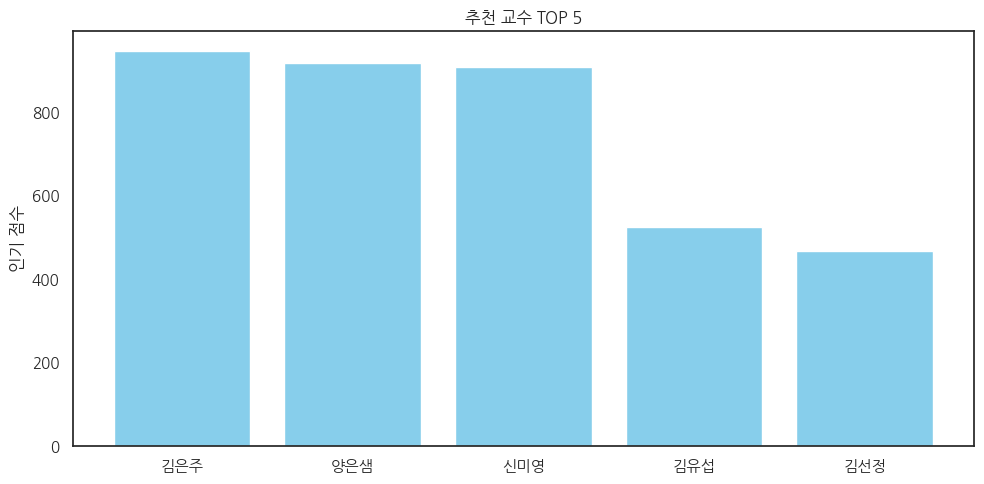

In [ ]:
# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 5))
plt.bar(top5["ÍµêÏàò Ïù¥Î¶Ñ"], top5["Ïù∏Í∏∞ Ï†êÏàò"], color="skyblue")
plt.title("Ï∂îÏ≤ú ÍµêÏàò TOP 5")
plt.ylabel("Ïù∏Í∏∞ Ï†êÏàò")
plt.tight_layout()
plt.show()

In [11]:
# 'grouped'Ïóê Ïù¥ÎØ∏ Í≥ÑÏÇ∞Îêú Ïª¨ÎüºÎì§Ïù¥ ÏûàÎã§Í≥† Í∞ÄÏ†ïÌï©ÎãàÎã§.
# Ïù∏Í∏∞ Ï†êÏàò(popularity_score) Í∏∞Ï§ÄÏúºÎ°ú ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨
ranked = grouped.sort_values("popularity_score", ascending=False).reset_index(drop=True)

print("üì¢ Ï∂îÏ≤ú ÍµêÏàò ÏàúÏúÑ:\n")
for idx, row in ranked.iterrows():
    print(f"---------- TOP {idx+1} ----------")
    print(f"ÍµêÏàò Ïù¥Î¶Ñ       : {row['professor']}")
    print(f"Í∏çÏ†ï ÌÇ§ÏõåÎìú Ïàò : {row['positive_score']}")
    print(f"Ï¥ù Î¶¨Î∑∞ Îã®Ïñ¥ Ïàò: {row['review_count']}")
    print(f"Ïù∏Í∏∞ Ï†êÏàò      : {row['popularity_score']:.1f}")
    print(f"ÎåÄÌëú ÌÇ§ÏõåÎìú    : {row['top_keywords']}")
    print()


üì¢ Ï∂îÏ≤ú ÍµêÏàò ÏàúÏúÑ:

---------- TOP 1 ----------
ÍµêÏàò Ïù¥Î¶Ñ       : ÍπÄÏùÄÏ£º
Í∏çÏ†ï ÌÇ§ÏõåÎìú Ïàò : 286
Ï¥ù Î¶¨Î∑∞ Îã®Ïñ¥ Ïàò: 6590
Ïù∏Í∏∞ Ï†êÏàò      : 945.0
ÎåÄÌëú ÌÇ§ÏõåÎìú    : Ïó¥Ï†ï, Ï≤¥Í≥Ñ, ÎèÑÏõÄ

---------- TOP 2 ----------
ÍµêÏàò Ïù¥Î¶Ñ       : ÏñëÏùÄÏÉò
Í∏çÏ†ï ÌÇ§ÏõåÎìú Ïàò : 305
Ï¥ù Î¶¨Î∑∞ Îã®Ïñ¥ Ïàò: 6104
Ïù∏Í∏∞ Ï†êÏàò      : 915.4
ÎåÄÌëú ÌÇ§ÏõåÎìú    : Î∞∞Î†§, ÏÑ§Î™Ö, Ïû¨Î∞åÎã§

---------- TOP 3 ----------
ÍµêÏàò Ïù¥Î¶Ñ       : Ïã†ÎØ∏ÏòÅ
Í∏çÏ†ï ÌÇ§ÏõåÎìú Ïàò : 247
Ï¥ù Î¶¨Î∑∞ Îã®Ïñ¥ Ïàò: 6587
Ïù∏Í∏∞ Ï†êÏàò      : 905.7
ÎåÄÌëú ÌÇ§ÏõåÎìú    : ÏÑ±Ïùò, Ìù•ÎØ∏, ÎèÑÏõÄ

---------- TOP 4 ----------
ÍµêÏàò Ïù¥Î¶Ñ       : ÍπÄÏú†ÏÑ≠
Í∏çÏ†ï ÌÇ§ÏõåÎìú Ïàò : 142
Ï¥ù Î¶¨Î∑∞ Îã®Ïñ¥ Ïàò: 3810
Ïù∏Í∏∞ Ï†êÏàò      : 523.0
ÎåÄÌëú ÌÇ§ÏõåÎìú    : Ï¢ãÎã§, ÎèÑÏõÄ, Ïù¥Ìï¥

---------- TOP 5 ----------
ÍµêÏàò Ïù¥Î¶Ñ       : ÍπÄÏÑ†Ï†ï
Í∏çÏ†ï ÌÇ§ÏõåÎìú Ïàò : 119
Ï¥ù Î¶¨Î∑∞ Îã®Ïñ¥ Ïàò: 3469
Ïù∏Í∏∞ Ï†êÏàò      : 465.9
ÎåÄÌëú ÌÇ§ÏõåÎìú    : Ïù¥Ìï¥, ÏâΩÎã§, Î∞∞Î†§

---------- TOP 6 ----------
Í

In [12]:
# 1. Ïù∏Í∏∞ Ï†êÏàò ÏàúÏúºÎ°ú Ï†ïÎ†¨Ìïú DataFrame Ï§ÄÎπÑ
ranked = grouped.sort_values("popularity_score", ascending=False).reset_index(drop=True)

# 2. Ï∂úÎ†•Ïö© Ïª¨ÎüºÎßå ÎΩëÍ≥†, ÌïúÍ∏Ä Ïª¨ÎüºÎ™ÖÏúºÎ°ú Î≥ÄÍ≤Ω
output = ranked[[
    "professor",       # ÍµêÏàò ÎÇ¥Î∂Ä Ïù¥Î¶Ñ
    "positive_score",  # Í∏çÏ†ï ÌÇ§ÏõåÎìú Ïàò
    "review_count",    # Ï¥ù Î¶¨Î∑∞(ÌÜ†ÌÅ∞) Ïàò
    "popularity_score",
    "top_keywords"
]].copy()
output.columns = [
    "ÍµêÏàò Ïù¥Î¶Ñ",
    "Í∏çÏ†ï ÌÇ§ÏõåÎìú Ïàò",
    "Ï¥ù Î¶¨Î∑∞ Îã®Ïñ¥ Ïàò",
    "Ïù∏Í∏∞ Ï†êÏàò",
    "ÎåÄÌëú ÌÇ§ÏõåÎìú"
]

# 3. CSVÎ°ú Ï†ÄÏû• (utf-8-sigÎ°ú Ïù∏ÏΩîÎî©ÌïòÎ©¥ ExcelÏóêÏÑú ÌïúÍ∏Ä Íπ®Ïßê Î∞©ÏßÄ)
output.to_csv("professor_recommendations.csv", index=False, encoding="utf-8-sig")

print("‚úÖ professor_recommendations.csv ÌååÏùºÏù¥ ÏÉùÏÑ±ÎêòÏóàÏäµÎãàÎã§.")


‚úÖ professor_recommendations.csv ÌååÏùºÏù¥ ÏÉùÏÑ±ÎêòÏóàÏäµÎãàÎã§.
